<a href="https://colab.research.google.com/github/newfull5/AI-Project/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Reshape
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

In [0]:
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization())
generator.add(Reshape((7, 7, 128)))
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same'))
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2)))
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

In [0]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable = False

In [0]:
ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [0]:
def gan_train(epoch, batch_size, saving_interval):

  (X_train, _), (_, _) = mnist.load_data()

  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
  X_train = (X_train - 127.5) / 127.5

  true = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))

  for i in range(epoch):
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    d_loss_real = discriminator.train_on_batch(imgs, true)

    # 가상 이미지를 판별자에 입력
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

    # 판별자와 생성자의 오차 계산
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    g_loss = gan.train_on_batch(noise, true)

    print('epoch:%d' % i, ' d_loss:%.4f' % d_loss, ' g_loss:%.4f' % g_loss)

    if i % saving_interval == 0:
      noise = np.random.normal(0, 1, (25, 100))
      gen_imgs = generator.predict(noise)
 
      gen_imgs = 0.5 * gen_imgs + 0.5
 
      fig, axs = plt.subplots(5, 5)  
      count = 0
      for j in range(5):
       for k in range(5):
        axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
        axs[j, k].axis('off')
        count += 1
        fig.savefig("gan_images/gan_mnist_%d.png" % i)

epoch:0  d_loss:0.4829  g_loss:0.1245
epoch:1  d_loss:0.4788  g_loss:0.0342
epoch:2  d_loss:0.5103  g_loss:0.0325
epoch:3  d_loss:0.4864  g_loss:0.0754
epoch:4  d_loss:0.4598  g_loss:0.2132
epoch:5  d_loss:0.4415  g_loss:0.4189
epoch:6  d_loss:0.4488  g_loss:0.5502
epoch:7  d_loss:0.4739  g_loss:0.5891
epoch:8  d_loss:0.4784  g_loss:0.5174
epoch:9  d_loss:0.4967  g_loss:0.4195
epoch:10  d_loss:0.5553  g_loss:0.2884
epoch:11  d_loss:0.5423  g_loss:0.2319
epoch:12  d_loss:0.4933  g_loss:0.2079
epoch:13  d_loss:0.4450  g_loss:0.2015
epoch:14  d_loss:0.3877  g_loss:0.2292
epoch:15  d_loss:0.3584  g_loss:0.2007
epoch:16  d_loss:0.3172  g_loss:0.1436
epoch:17  d_loss:0.2823  g_loss:0.1129
epoch:18  d_loss:0.2795  g_loss:0.1463
epoch:19  d_loss:0.2703  g_loss:0.2292
epoch:20  d_loss:0.2868  g_loss:0.1613
epoch:21  d_loss:0.3822  g_loss:0.2119
epoch:22  d_loss:0.4980  g_loss:0.4242
epoch:23  d_loss:0.8945  g_loss:0.1865
epoch:24  d_loss:0.7843  g_loss:0.5711
epoch:25  d_loss:0.7312  g_loss:0.8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


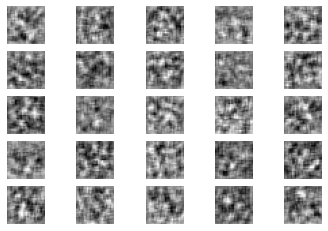

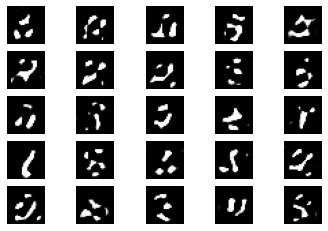

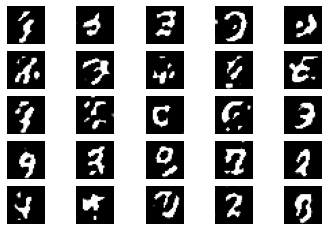

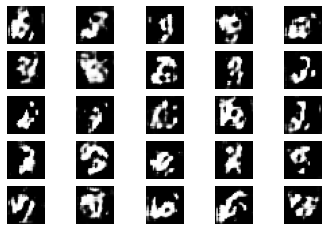

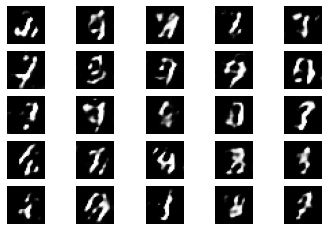

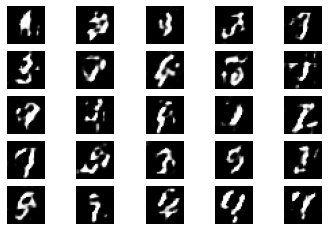

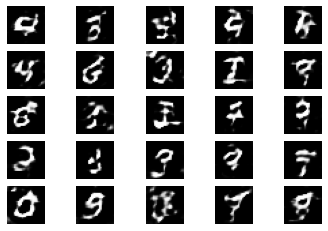

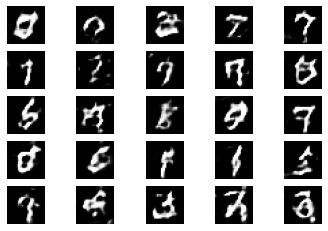

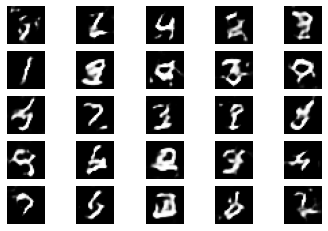

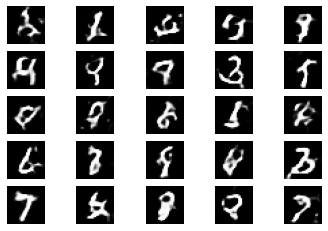

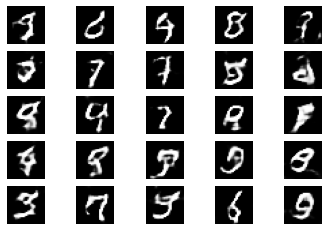

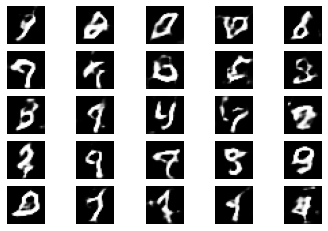

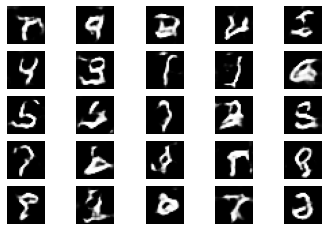

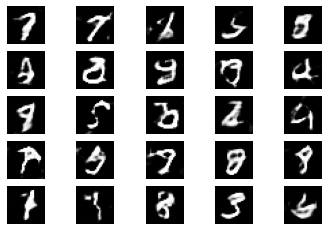

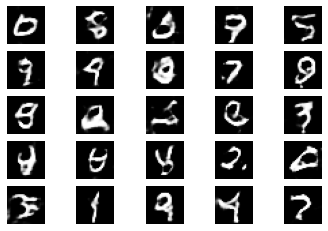

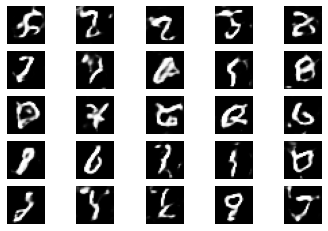

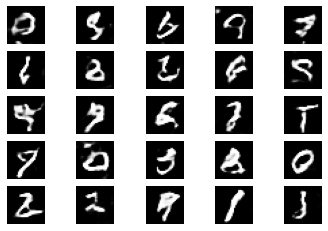

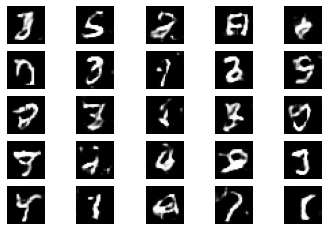

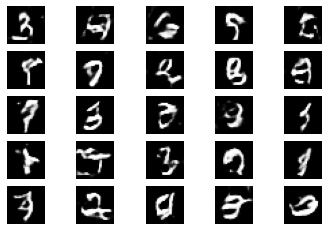

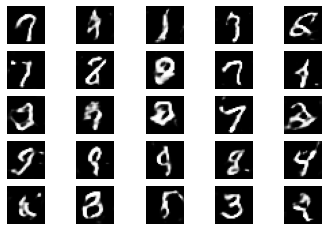

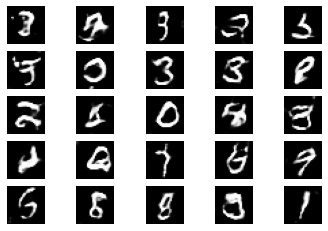

In [10]:
gan_train(4001, 32, 200)